In [19]:
import trimesh
mesh = trimesh.load('datasets/dataset_snippet_medium_normalized/AircraftBuoyant/m1344.obj')

# Local Descriptors Histograms

In [15]:
import os
import pandas as pd
import ast
import matplotlib.pyplot as plt
import re


# Function to create a directory if it doesn't exist
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

def plot_metric_for_class(local_descriptors_df, class_name, metrics, save_dir, num_bins=30):
    """
    Create one plot for each metric (A3, D1, D2, D3, D4) for all objects in a class.
    Each plot will contain lines for all objects' histograms for that metric.
    """
    class_data = local_descriptors_df[local_descriptors_df['obj_class'] == class_name]
    
    # Directory to save the plots
    class_save_dir = os.path.join(save_dir, class_name)
    create_directory(class_save_dir)
    
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for _, row in class_data.iterrows():
            file_name = row['file_name']
            data = row[metric]
            plt.plot(data, label=file_name)

        # Set plot details
        plt.title(f"{metric} Histograms for Class {class_name}")
        plt.xlabel('Bins')
        plt.ylabel('Frequency')
        plt.legend(loc='upper right', fontsize='small')
        plt.grid(True)
        
        # Save the plot
        plt.savefig(os.path.join(class_save_dir, f"{metric}_plot.png"))
        plt.close()

    print(f"All plots saved for class {class_name}!")
    

# Main function to loop through all classes and create the plots
def create_all_class_plots(local_descriptors_df, save_dir):
    """
    Loop through each class and create 5 plots (one for each metric: A3, D1, D2, D3, D4).
    Each plot will contain lines representing the histograms of all objects for that metric.
    """
    metrics = ['A3', 'D1', 'D2', 'D3', 'D4']  # List of metrics
    class_names = local_descriptors_df['obj_class'].unique()  # Get all unique classes
    
    # Create a folder for the plots
    create_directory(save_dir)

    for class_name in class_names:
        plot_metric_for_class(local_descriptors_df, class_name, metrics, save_dir)


# Load the CSV file
local_descriptors_df = pd.read_csv('outputs/data/local_descriptors.csv')

# Convert the string representations of lists back to actual lists
for col in ['A3', 'D1', 'D2', 'D3', 'D4']:
    local_descriptors_df[col] = local_descriptors_df[col].apply(lambda x: ast.literal_eval(x))



# Directory to save plots
main_save_dir = 'local_desc_plots'
create_directory(main_save_dir)

create_all_class_plots(local_descriptors_df, main_save_dir)


print("All histograms saved successfully!")

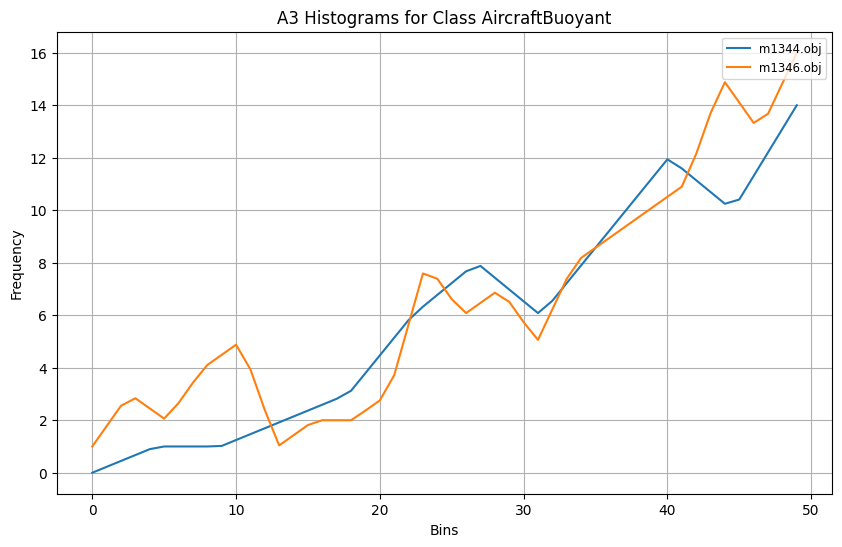

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def resample_histogram(data, num_bins=50):
    """Resample the histogram to a fixed number of bins."""
    x = np.linspace(0, len(data) - 1, len(data))  # Original bin positions
    f = interpolate.interp1d(x, data, kind='linear')  # Linear interpolation
    x_new = np.linspace(0, len(data) - 1, num_bins)  # New bin positions
    return f(x_new)

def plot_multiple_lines(class_name, data_list, file_names, num_bins=50):
    """Plot the A3 histograms for all objects in a class as multiple lines."""
    plt.figure(figsize=(10, 6))

    for data, file_name in zip(data_list, file_names):
        # Resample the histogram to the same number of bins
        resampled_data = resample_histogram(data, num_bins)
        # Plot each object's A3 histogram as a line
        plt.plot(resampled_data, label=file_name)

    plt.title(f"A3 Histograms for Class {class_name}")
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right', fontsize='small')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you have a list of A3 histograms and corresponding file names for a class
class_name = "AircraftBuoyant"
a3_histograms = [
    [0, 1, 1, 2, 3, 6, 8, 6, 9, 12, 10, 14],
    [1, 3, 2, 4, 5, 1, 2, 2, 3, 8, 6, 7, 5, 8, 9, 10, 11, 15, 13, 16],
    # Add more A3 histograms for other objects in the class
]
file_names = ["m1344.obj", "m1346.obj"]

# Plot all the A3 histograms for this class
plot_multiple_lines(class_name, a3_histograms, file_names, num_bins=50)


# Voxelize mesh

0.02829000000000001


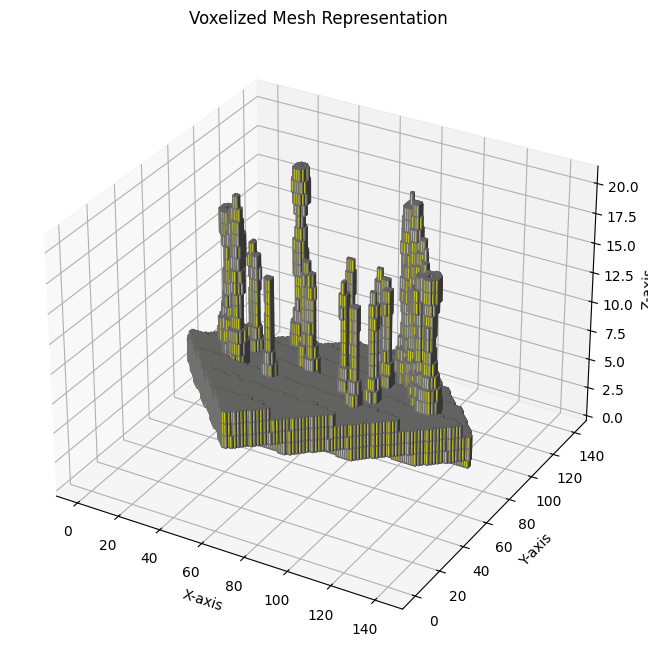

<trimesh.VoxelGrid(142, 141, 21)>

In [29]:
import matplotlib.pyplot as plt
import trimesh
import numpy as np

def plot_voxelized_mesh(mesh, pitch=0.005):
    """
    Voxelizes the input mesh and plots the voxelized mesh as 3D voxels.
    
    Parameters:
        mesh (trimesh.Trimesh): The input mesh to voxelize.
        pitch (float): The size of each voxel (default is 0.05).
        
    Returns:
        voxelized_mesh: The voxelized mesh.
    """
    # Voxelize the mesh
    voxelized_mesh = mesh.voxelized(pitch)
    print(voxelized_mesh.volume)
    # Get the filled voxel grid (boolean grid)
    filled_voxels = voxelized_mesh.matrix

    # Get the voxel grid shape
    shape = filled_voxels.shape

    # Create a 3D grid for plotting
    x, y, z = np.indices((shape[0] + 1, shape[1] + 1, shape[2] + 1))

    # Plot the voxel grid
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot voxels where the voxel grid is filled (True)
    ax.voxels(x, y, z, filled_voxels, facecolors='yellow', edgecolors='gray')

    # Label and set plot
    ax.set_title('Voxelized Mesh Representation')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    plt.show()

    return voxelized_mesh

# Example usage:

# Load the mesh
mesh = trimesh.load('datasets/dataset_snippet_medium_normalized/Chess/m1595.obj')
plot_voxelized_mesh(mesh, pitch=0.01)



# Check Global Descriptors

### Elongation

In [11]:
import trimesh
import numpy as np

def compute_elongation(mesh):
    extents = mesh.bounding_box_oriented.extents
    sorted_extents = np.sort(extents) 
    print(f"Sorted extends: {sorted_extents}")

    elongation = sorted_extents[-1] / sorted_extents[-2]

    return elongation

round_object = 'datasets/dataset_snippet_medium_normalized/Drum/D00115.obj'
long_object = 'datasets/dataset_snippet_medium_normalized/Sword/D00992.obj'

round_object_mesh = trimesh.load(round_object)
long_object_mesh = trimesh.load(long_object)

print("Round object")
print(f"Elongation: {compute_elongation(round_object_mesh)}")
print()
print("Long object")
print(f"Elongation: {compute_elongation(long_object_mesh)}")

Round object
Sorted extends: [0.60027802 0.60354348 0.825552  ]
Elongation: 1.367841807312158

Long object
Sorted extends: [0.04020034 0.31897965 1.01168248]
Elongation: 3.1716207293415324


### Rectangularity

In [16]:
import trimesh

def compute_voxel_volume(mesh, pitch=0.01):
    voxelized = mesh.voxelized(pitch)
    total_volume = voxelized.volume
    return total_volume

def compute_rectangularity(mesh, volume):
    obb = mesh.bounding_box_oriented        
    rectangularity = volume / obb.volume  
    
    print(f"Mesh volume: {volume}  |  OBB volume: {obb.volume}")
    return rectangularity



not_rectangular_object = 'datasets/dataset_snippet_medium_normalized/Biplane/m1127.obj'
rectangular_object = 'datasets/dataset_snippet_medium_normalized/Door/D01141.obj'

not_rectangular_object_mesh = trimesh.load(not_rectangular_object)
rectangular_object_mesh = trimesh.load(rectangular_object)

not_rectangular_object_volume = compute_voxel_volume(not_rectangular_object_mesh)
rectangular_object_volume = compute_voxel_volume(rectangular_object_mesh)

print("Not rectangular object")
print(f"Rectangularity: {compute_rectangularity(not_rectangular_object_mesh, not_rectangular_object_volume)}")
print()
print("Rectangular object")
print(f"Rectangularity: {compute_rectangularity(rectangular_object_mesh, rectangular_object_volume)}")

Not rectangular object
Mesh volume: 0.010368000000000004  |  OBB volume: 0.1808983192293893
Rectangularity: 0.0573139653489693

Rectangular object
Mesh volume: 0.012352000000000005  |  OBB volume: 0.03964519811876834
Rectangularity: 0.31156358363996856


### Compactness

In [31]:
import trimesh

def compute_surface_area(mesh):
    return mesh.area

def compute_voxel_volume(mesh, pitch=0.01):
    voxelized = mesh.voxelized(pitch)
    total_volume = voxelized.volume
    return total_volume

def compute_compactness(mesh, volume):
    area = compute_surface_area(mesh)
    compactness = (area ** 3) / (36 * np.pi * (volume ** 2))
    return compactness


not_compact_object = 'datasets/dataset_snippet_medium_normalized/Sign/m1680.obj'
compact_object = 'datasets/dataset_snippet_medium_normalized/Drum/D00063.obj'

not_compact_object_mesh = trimesh.load(not_compact_object)
compact_object_mesh = trimesh.load(compact_object)

not_compact_object_object_volume = compute_voxel_volume(not_compact_object_mesh)
compact_object_volume = compute_voxel_volume(compact_object_mesh)

print("Not compact object")
print(f"Compactness: {compute_compactness(not_compact_object_mesh, not_compact_object_object_volume)}")
print()
print("Compact object")
print(f"Compactness: {compute_compactness(compact_object_mesh, compact_object_volume)}")

Not compact object
Compactness: 38.34224864162249

Compact object
Compactness: 444.8842480505854


### Diameter

In [177]:
import trimesh
import random

def get_diameter(mesh, method="fast"):
    convex_hull = mesh.convex_hull
    max_dist = 0
    vertices = list(convex_hull.vertices)
    print(f"Vertices of convex hull: {len(vertices)}")
    
    if method == "fast": 
        """SAMPLE 200 VERTICES"""
    
        if len(vertices) > 200:
            vertices = random.sample(vertices, 1000)
    
    if method == "slow":
        pass
    
    for i in range(len(vertices)):
        for j in range(i, len(vertices)):
            dist = np.linalg.norm(vertices[i] - vertices[j])
            if dist > max_dist:
                max_dist = dist
    
    return max_dist


short_diameter_object = 'datasets/dataset_snippet_medium_normalized/PlantIndoors/D00087.obj'
long_diameter_object = 'datasets/dataset_snippet_medium_normalized/Musical_Instrument/m646.obj'

short_diamete_object_mesh = trimesh.load(short_diameter_object)
long_diameter_object_mesh = trimesh.load(long_diameter_object)

print("Short diameter object")
print(f"Diameter: {get_diameter(short_diamete_object_mesh)}")
print()
print("Long diameter object")
print(f"Diameter: {get_diameter(long_diameter_object_mesh)}")

Short diameter object
Vertices of convex hull: 185
Diameter: 1.055804258777098

Long diameter object
Vertices of convex hull: 132
Diameter: 1.2183989532656814


### Convexity

In [180]:
import trimesh

def compute_voxel_volume(mesh, pitch=0.01):
    voxelized = mesh.voxelized(pitch)
    total_volume = voxelized.volume
    return total_volume

def compute_convexity(mesh, volume):
    """
    Computes the convexity of the mesh.
    Convexity is defined as the ratio of the mesh volume to the volume of its convex hull.
    
    Parameters:
        mesh (trimesh.Trimesh): The input mesh.
        
    Returns:
        float: The convexity of the mesh.
        
    Raises:
        ValueError: If the mesh is not watertight (no volume).
    """
    convex_hull = mesh.convex_hull
    convex_hull_volume = compute_voxel_volume(convex_hull)
    convexity = min((volume / convex_hull_volume), 1.0)
    convexity = max(0, convexity)
    return convexity


not_convex_object = 'datasets/dataset_snippet_medium_normalized/Sign/m1680.obj'
convex_object = 'datasets/dataset_snippet_medium_normalized/Drum/D00063.obj'

not_convex_object_mesh = trimesh.load(not_convex_object)
convex_object_mesh = trimesh.load(convex_object)

not_convex_object_volume = compute_voxel_volume(not_convex_object_mesh)
convex_object_volume = compute_voxel_volume(convex_object_mesh)

print("Not convex object")
print(f"Convexity: {compute_convexity(not_convex_object_mesh, not_convex_object_volume)}")
print()
print("Convex object")
print(f"Convexity: {compute_convexity(convex_object_mesh, convex_object_volume)}")

Not convex object
Convexity: 0.5096685082872928

Convex object
Convexity: 1.0


### Eccentricity

In [191]:
import trimesh
import sys

def compute_eccentricity(mesh):
    """
    Computes the eccentricity of the mesh.
    Eccentricity is defined as the ratio of the largest to smallest eigenvalues of the covariance matrix of the vertices.
    
    Parameters:
        mesh (trimesh.Trimesh): The input mesh.
        
    Returns:
        float: The eccentricity of the mesh.
    """
    eigenvalues, _ = get_eigen(mesh)
    # Sort the eigenvalues in ascending order
    eigenvalues = np.sort(np.abs(eigenvalues))
    
    lambda_3  = eigenvalues[0]
    lambda_1  = eigenvalues[-1]
    
    # Handle zero eigenvalues to prevent division by zero
    if lambda_3 == 0:
        lambda_3 = sys.float_info.min  # Smallest positive float
    
    eccentricity = lambda_1 / lambda_3
    return eccentricity


def get_eigen(mesh):
    """
    Computes the eigenvalues and eigenvectors of the covariance matrix of the mesh vertices.
    
    Parameters:
        mesh (trimesh.Trimesh): The input mesh.
        
    Returns:
        tuple: (eigenvalues, eigenvectors)
    """
    vertices = mesh.vertices
    # Compute covariance matrix; set rowvar=False because each row is an observation (vertex)
    covariance_matrix = np.cov(vertices, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    return eigenvalues, eigenvectors


not_eccentric_object = 'datasets/dataset_snippet_medium_normalized/Tool/m1111.obj'
eccentric_object = 'datasets/dataset_snippet_medium_normalized/Drum/D00709.obj'

not_eccentric_object_mesh = trimesh.load(not_eccentric_object)
eccentric_object_mesh = trimesh.load(eccentric_object)

print("Not eccentric object")
print(f"Eccentricity: {compute_eccentricity(not_eccentric_object_mesh)}")
print()
print("Eccentric object")
print(f"Eccentricity: {compute_eccentricity(eccentric_object_mesh)}")

Not eccentric object
Eccentricity: 126.14757738890484

Eccentric object
Eccentricity: 4.93031844216137


### Sphericity

In [198]:
import trimesh

def compute_voxel_volume(mesh, pitch=0.01):
    voxelized = mesh.voxelized(pitch)
    
    total_volume = voxelized.volume
    return total_volume

def compute_compactness(mesh, volume):
    area = compute_surface_area(mesh)
    compactness = (area ** 3) / (36 * np.pi * (volume ** 2))
    return compactness


def compute_sphericity(compactness):
    sphericity = min((1/compactness), 1.0)
    sphericity = max(0, sphericity)

    return  sphericity


not_spherical_object = 'datasets/dataset_snippet_medium_normalized/AircraftBuoyant/m1347.obj'
spherical_object = 'datasets/dataset_snippet_medium_normalized/AircraftBuoyant/m1351.obj'

not_spherical_object_mesh = trimesh.load(not_spherical_object)
spherical_object_mesh = trimesh.load(spherical_object)

not_spherical_object_volume = compute_voxel_volume(not_spherical_object_mesh)
spherical_object_volume = compute_voxel_volume(spherical_object_mesh)

not_spherical_object_compactness = compute_compactness(not_spherical_object_mesh, not_spherical_object_volume)
spherical_object_compactness = compute_compactness(spherical_object_mesh, spherical_object_volume)

print("Not spherical object")
print(f"Sphericity: {compute_sphericity(not_spherical_object_compactness)}")
print()
print("Spherical object")
print(f"Sphericity: {compute_sphericity(spherical_object_compactness)}")

Not spherical object
Sphericity: 0.015501944644075172

Spherical object
Sphericity: 0.023035551928644905
